## Building Random Quantum Circuits, with and without Noise, to Analyse Measurement Outcome Fidelity

**Authors:** Pranavi Jain, Dr Marcin Abram

**Affiliation:** University of Southern California

**1) Configure Qiskit Runtime Service**

In [1]:
from qiskit_ibm_runtime import QiskitRuntimeService
from config import api_key


# Save an IBM Quantum account and set it as your default account.

QiskitRuntimeService.save_account(
    channel="ibm_quantum", token=api_key, set_as_default=True, overwrite=True
)

# Load saved credentials

service = QiskitRuntimeService()

**2) Generate a Random Circuit for Given Parameters**
- Args:
    * num_q - number of qubits
    * depth - depth of qauntum circuit
    * gate_set - dictionary of specified set of gates (defined in random_circuit.py module)

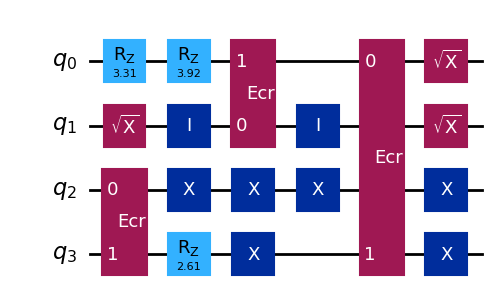

In [4]:
from random_circuit import eagle_gate_set, basis_gate_set
from random_circuit import get_random_circuit

## Main Function -- 1) Calling Random Circuit Generator
num_q = 4
depth = 5
gate_set = eagle_gate_set

circuit = get_random_circuit(num_q, depth, gate_set)
circuit.draw("mpl")

**3) Add an arbitrary Noise to the random circuit at an arbitrary position**
- Args:
    * qubit - list of qubits to which the noise is applied
    * pos - the position (in terms of depth) at which noise is added
    * gate - noise gate to be added

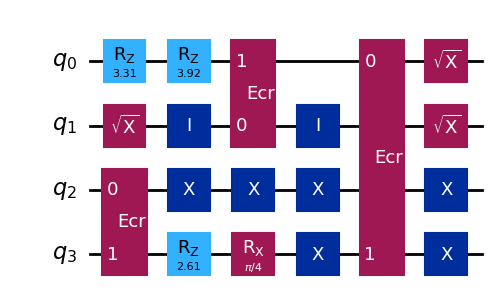

In [6]:
from qiskit.circuit.library import standard_gates
from utils import modify_circuit
import numpy as np


## Main Function -- 2) New circuit with Noise added
qubit = [3]
pos = 3
gate = standard_gates.RXGate(np.pi / 4)

noisyCirc = modify_circuit(qubit, gate, pos, circuit)
noisyCirc.draw("mpl")

**4) Performing measurements on the two Circuits (with and without noise)**
<br>
Measuring the qubits randomly in {X,Y,Z} basis for 'n' number of runs - **Shadow tomography**
- Args:
    * runs - number of measurements to be performed
    * num_q - number of qubits in the circuit
    * backend - Qiskit backend on which jobs will run
- Returns:
    * meas1 - measurement output of random circuit for 'n' runs
    * meas2 - measurement output of same circuit for 'n' runs
    * noiseMeas - measurement output of noisy circuit for 'n' runs

In [7]:
from qiskit.providers.basic_provider import BasicSimulator
from qiskit.providers.fake_provider import GenericBackendV2
from measure_circuit import get_random_basis_list, get_meas_output

## Main Function -- 3) Performing Measurements
runs = 20
# backend = BasicSimulator()
backend = GenericBackendV2(num_qubits=num_q)
basis_list = get_random_basis_list(runs, num_q)
print("Measurement basis:\n" + str(basis_list))

meas1 = get_meas_output(circuit, backend, basis_list)
meas2 = get_meas_output(circuit, backend, basis_list)
noiseMeas = get_meas_output(noisyCirc, backend, basis_list)

print("\nFirst 5 measurement outcomes for the random circuit:")
for i in range(0, 5):
    print(meas1[i])

print("\nFirst 5 measurement outcomes for the circuit WITH noise:")
for i in range(0, 5):
    print(noiseMeas[i])

Measurement basis:
['XYZY', 'YXZZ', 'YYZX', 'YZXY', 'ZZYX', 'XXYX', 'YXZZ', 'XYZX', 'ZXYY', 'ZZXY', 'YYZY', 'ZXXY', 'XYXY', 'ZZZZ', 'YYYZ', 'XZXZ', 'XZYY', 'YZXY', 'YYYZ', 'XYXX']

First 5 measurement outcomes for the random circuit:
['XYZY', {'1101': 65, '0100': 196, '1100': 168, '0111': 202, '0110': 65, '1111': 186, '0101': 73, '1110': 67, '0011': 2}]
['YXZZ', {'1111': 248, '0110': 203, '1101': 276, '0100': 236, '0101': 20, '1110': 17, '0111': 13, '1100': 9, '1010': 1, '0000': 1}]
['YYZX', {'1101': 56, '0100': 211, '1110': 62, '0101': 207, '1111': 48, '0110': 193, '1100': 62, '0111': 184, '0001': 1}]
['YZXY', {'0011': 139, '1100': 141, '0111': 115, '0000': 136, '1000': 135, '1111': 122, '0100': 101, '1011': 128, '0010': 2, '1010': 2, '1110': 1, '1101': 1, '1001': 1}]
['ZZYX', {'1011': 33, '0010': 84, '0101': 93, '0110': 109, '0100': 94, '1101': 36, '0011': 100, '0000': 109, '0111': 96, '1010': 31, '0001': 86, '1000': 32, '1100': 35, '1110': 23, '1001': 36, '1111': 27}]

First 5 measu

**5) Compute and Plot Fidelities**
- Fidelities are computed for the circuit compared to itself and the noisy circuit.
- The plot is given for cumulative fidelities with increasing number of runs.

Circuit fidelities - [0.9958503567052817, 10.924190545160751]
Noisy circuit - [0.9958037166472948, 10.529988450682021]


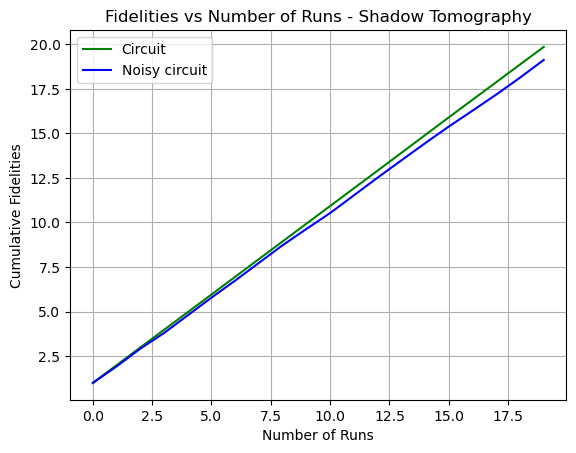

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from utils import get_fidelity_data

## Main Function cntd -- 4) Computing Fidelity between:
#   - circOp1 & circOp2
#   - circOp1 & noiseCircOutput

classicalF = get_fidelity_data(meas1, meas2, noiseMeas)
circF = classicalF.get("C2C")
noisyF = classicalF.get("C2N")
print("Circuit fidelities - " + str(circF[::10]))
print("Noisy circuit - " + str(noisyF[::10]))

# plotting fidelities vs number of runs
x = np.arange(0, len(circF))
plt.title("Fidelities vs Number of Runs - Shadow Tomography")
plt.xlabel("Number of Runs")
plt.ylabel("Cumulative Fidelities")
plt.plot(x, circF, color="green", label="Circuit")
plt.plot(x, noisyF, color="blue", label="Noisy circuit")
plt.grid()
plt.legend()
plt.show()

**6) Fidelities for Measurement Performed on Classical Basis**
<br/>
The same circuits are measured in classical basis, the fidelities are computed and the plot is obtained for a comparison with plot above.

Measurement basis:
['XXXX', 'YYYY', 'ZZZZ', 'XXXX', 'YYYY', 'ZZZZ', 'XXXX', 'YYYY', 'ZZZZ', 'XXXX', 'YYYY', 'ZZZZ', 'XXXX', 'YYYY', 'ZZZZ', 'XXXX', 'YYYY', 'ZZZZ', 'XXXX', 'YYYY']
First 5 measurement outcomes for the random circuit:
['XXXX', {'1111': 31, '0110': 91, '0011': 109, '1100': 32, '0001': 96, '1001': 24, '1011': 35, '0010': 75, '0101': 95, '0000': 83, '0100': 119, '1110': 30, '0111': 100, '1010': 30, '1000': 38, '1101': 36}]
['YYYY', {'1001': 72, '1010': 69, '0110': 74, '1111': 70, '1100': 59, '1000': 69, '0100': 58, '0101': 68, '0111': 62, '0011': 65, '0001': 56, '1101': 49, '1110': 53, '1011': 57, '0000': 72, '0010': 71}]
['ZZZZ', {'0101': 236, '1110': 249, '0110': 12, '1111': 249, '1101': 21, '0100': 214, '1100': 16, '0111': 24, '0011': 1, '1011': 1, '1010': 1}]
['XXXX', {'0001': 108, '1101': 30, '0100': 94, '0000': 110, '1000': 27, '0011': 97, '1100': 38, '0110': 99, '0010': 98, '0101': 84, '1111': 28, '1010': 26, '0111': 94, '1011': 26, '1001': 35, '1110': 30}]
['YYYY', 

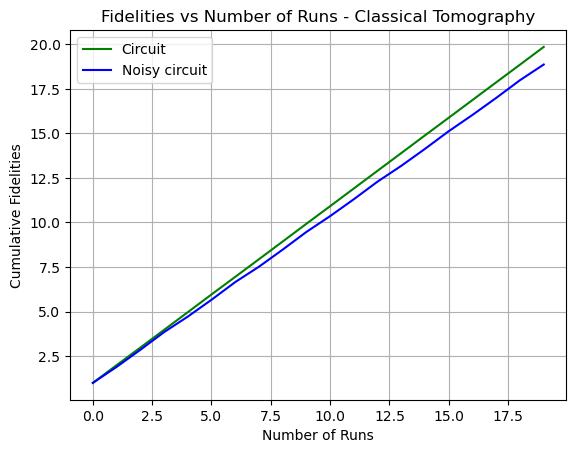

In [9]:
from qiskit.providers.basic_provider import BasicSimulator
from measure_circuit import get_meas_output, get_standard_basis_list
import numpy as np
import matplotlib.pyplot as plt
from utils import get_fidelity_data

## Main Function -- 5) Classical Tomography
classical_basis = get_standard_basis_list(runs, num_q)
print("Measurement basis:\n" + str(classical_basis))

meas1 = get_meas_output(circuit, backend, classical_basis)
meas2 = get_meas_output(circuit, backend, classical_basis)
noiseMeas = get_meas_output(noisyCirc, backend, classical_basis)

print("First 5 measurement outcomes for the random circuit:")
for i in range(0, 5):
    print(meas1[i])

print("\nFirst 5 measurement outcomes for the circuit WITH noise:")
for i in range(0, 5):
    print(noiseMeas[i])

classicalF = get_fidelity_data(meas1, meas2, noiseMeas)
circF = classicalF.get("C2C")
noisyF = classicalF.get("C2N")
print("\nCircuit fidelities - " + str(circF[::20]))
print("Noisy circuit - " + str(noisyF[::20]))

# plotting fidelities vs number of runs
x = np.arange(0, len(circF))
plt.title("Fidelities vs Number of Runs - Classical Tomography")
plt.xlabel("Number of Runs")
plt.ylabel("Cumulative Fidelities")
plt.plot(x, circF, color="green", label="Circuit")
plt.plot(x, noisyF, color="blue", label="Noisy circuit")
plt.grid()
plt.legend()
plt.show()